In [3]:
# 1.Generación del conjunto de datos (100 ejemplos):
import numpy as np

X = 2 * np.random.rand(100, 1) #Número de equipos afectados

y = 4 + 3 * X + np.random.randn(100, 1) #Coste del incidente


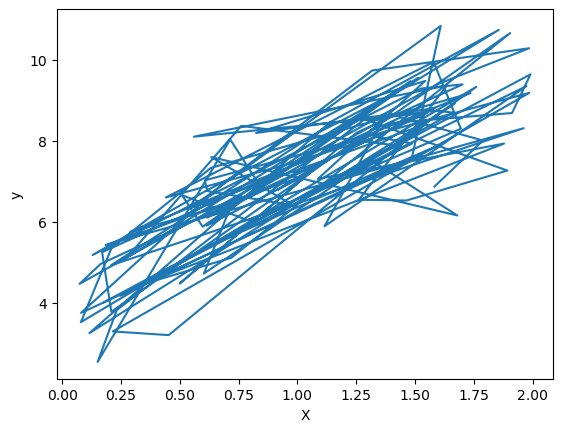

In [9]:
#2.Visualización del conjunto de datos (comprueba que tiene una tendencia lineal):


import matplotlib.pyplot as plt

%matplotlib inline

#TODO usa plt.plot y etiquétalos con plt.xlabel y plt.ylabel
plt.plot(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

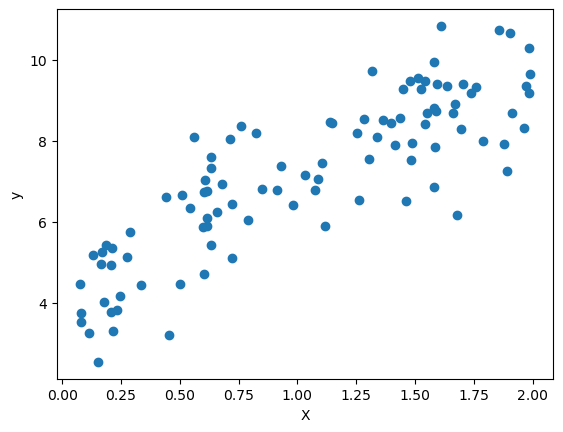

In [11]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

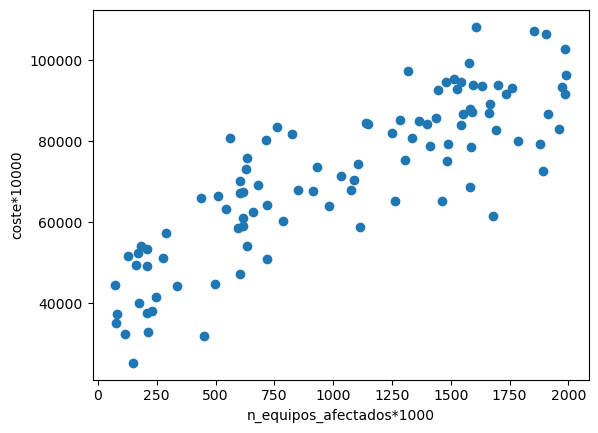

In [21]:

import pandas as pd

data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # Crea un diccionario usando flatten para aplanar el array

#TODO convierte data en un DataFrame df de pandas
df = pd.DataFrame(data)
df.head(10) # Comprueba el resultado

#TODO escala el número de equipos afectados (*1000) y el coste (*10000) y conviértelos a int.
df['n_equipos_afectados'] = (df['n_equipos_afectados'] * 1000).astype(int)
df['coste'] = (df['coste'] * 10000).astype(int)

#TODO vuelve a representarlo gráficamente
plt.scatter( df['n_equipos_afectados'], df['coste'])
plt.xlabel("n_equipos_afectados*1000")
plt.ylabel("coste*10000")
plt.show()


In [27]:
# 4.- Construcción del modelo (entrenamiento):


from sklearn.linear_model import LinearRegression

# Construcción del modelo y ajuste de la función hipótesis

lin_reg = LinearRegression()

# TODO entrena con lin_reg.fit(). La cual recibe las variables de entrada (en este caso solo tenemos una columna X), y la variable de salida y. Comprueba cómo hacerlo en fit

# Nota: Tendrás que hacer un .reshape(-1, 1) a la variable X (equipos afectados)
reshape_X = df['n_equipos_afectados'].values.reshape(-1, 1)
y = df['coste'].values

lin_reg.fit(reshape_X, y)

# Una vez entrenado puedes obtener theta 0
theta_0 = lin_reg.intercept_
print(f"Intercepto (theta 0): {theta_0}")

# y un array con theta 1... theta n (en este caso solo tenemos uno) con
theta_1 = lin_reg.coef_[0]  # Solo hay un coeficiente en este caso
print(f"Coeficiente (theta 1): {theta_1}")

Intercepto (theta 0): 42725.82127588912
Coeficiente (theta 1): 27.67443882218955


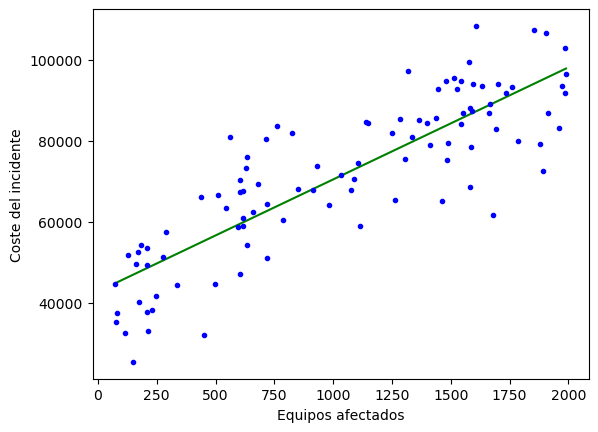

In [29]:

# 5.- Representación gráfica de la función hipótesis generada: 


# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento

X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])

y_train_pred = lin_reg.predict(X_min_max)

# Gráfica

plt.plot(X_min_max, y_train_pred, "g-")

plt.plot(df['n_equipos_afectados'], df['coste'], "b.")

plt.xlabel("Equipos afectados")

plt.ylabel("Coste del incidente")

plt.show()

In [33]:
# 6.- Predicción de nuevos ejemplos

# Comprueba cómo hacerlo en predict

x_new = np.array([[1300]]) # para 1300 equipos afectados

# Predicción del coste que tendría el incidente

coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 78702 €
